In [173]:
# !pip install datasets
from collections import Counter
from datasets import load_dataset
from tqdm.auto import tqdm
import json
from decimal import Decimal
from collections.abc import Mapping, Iterable
from datetime import datetime

from decimal import Decimal
from collections.abc import Mapping, Iterable
from datetime import datetime

with open('total.json') as f:
    dataset = json.load(f)

# length of dataset
print('length of total', len(dataset))

length of total 293461


In [174]:
print(dataset[0])
print(dataset[0].keys())

{'main_category': 'AMAZON FASHION', 'title': 'Chowsir Women Fashion V-Neck Formal Lace Evening Party Prom Midi Dress', 'average_rating': 4.3, 'rating_number': 127, 'features': ['Lace', 'Zipper closure', 'Made of Lace, soft and comfortable fabric.', 'S=US 2, M=US 6, L=US 10, XL=US 14, XXL=US 18. Please read our Size Table image instead of the size chart.', 'Vintage, elgant, slim fit.', 'Belt decoration, zipper on back.', 'Suit for wedding, party, cocktail, prom, gala, evening, dating.'], 'description': ['Size Table:', 'Chowsir Size-----General Size----US Size-------Bust--------Waist----- Length', 'Small---------------------XS---------------2-------------33.5"-------27.2"-------39.9"', 'Medium------------------S ----------------6-------------35.4"-------29.1"-------39.4"', 'Large---------------------M---------------10-------------37.4"-------31.1"-------39.8"', 'X-Large------------------L----------------14-------------40.6"-------33.7"-------40.6"', 'XX-Large----------------XL-----------

In [175]:
# print list length
print(len(dataset[0]['review']))

# print each review image number, if not exist, print None
for review in dataset[0]['review']:
    print(review)
    print(review.get('images', None))
   

9
{'rating': 5.0, 'title': 'Beauty in pink', 'text': 'I love this dress. I received so many compliments.', 'images': [{'attachment_type': 'IMAGE', 'large_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL.jpg', 'medium_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL._SL800_.jpg', 'small_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL._SL256_.jpg'}], 'asin': 'B07PJWD5W9', 'parent_asin': 'B07PK1Z4JF', 'user_id': 'AGQA3324WVPML5GL6OV4X6RONHGQ', 'timestamp': 1559440846637, 'helpful_vote': 7, 'verified_purchase': True}
[{'attachment_type': 'IMAGE', 'large_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL.jpg', 'medium_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL._SL800_.jpg', 'small_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71EEaZJOhRL._SL256_.jpg'}]
{'rating': 5.0, 'title': 'Beautiful dress. My mom loved it.', 'text': 'Beautiful dress. My mom l

In [176]:
# print total number of reviews
total_reviews = 0

for data in dataset:
    total_reviews += len(data['review'])

print('total reviews', total_reviews)

total reviews 1257127


In [177]:
# print the timestamps of the first reviews

for review in dataset[0]['review']:
    print(review['timestamp'])

1559440846637
1560622454238
1565706667863
1570576002300
1576939218236
1571788005265
1561754265070
1572802658696
1603085499200


In [178]:
# check if other reviews timestamps are also time ascending
for i in range(1000):
    for j in range(len(dataset[i]['review']) - 1):
        if dataset[i]['review'][j]['timestamp'] > dataset[i]['review'][j+1]['timestamp']:
            print(i, 'not ascending')
            break

0 not ascending
1 not ascending
2 not ascending
3 not ascending
7 not ascending
9 not ascending
11 not ascending
12 not ascending
13 not ascending
14 not ascending
15 not ascending
16 not ascending
18 not ascending
19 not ascending
20 not ascending
21 not ascending
22 not ascending
23 not ascending
24 not ascending
26 not ascending
29 not ascending
30 not ascending
33 not ascending
34 not ascending
35 not ascending
36 not ascending
39 not ascending
41 not ascending
44 not ascending
45 not ascending
47 not ascending
49 not ascending
51 not ascending
52 not ascending
53 not ascending
54 not ascending
58 not ascending
59 not ascending
60 not ascending
62 not ascending
64 not ascending
65 not ascending
66 not ascending
67 not ascending
68 not ascending
69 not ascending
71 not ascending
72 not ascending
73 not ascending
74 not ascending
75 not ascending
76 not ascending
77 not ascending
78 not ascending
80 not ascending
81 not ascending
82 not ascending
83 not ascending
85 not ascending
87 

In [179]:
# for each product, sort the reviews by timestamp in ascending order
for i in range(len(dataset)):
    dataset[i]['review'] = sorted(dataset[i]['review'], key=lambda x: x['timestamp'])

In [180]:
# check if other reviews timestamps are also time ascending
for data in dataset:
    for j in range(len(data['review']) - 1):
        if data['review'][j]['timestamp'] > data['review'][j+1]['timestamp']:
            print(i, 'not ascending')
            break

In [181]:
print(dataset[0])

{'main_category': 'AMAZON FASHION', 'title': 'Chowsir Women Fashion V-Neck Formal Lace Evening Party Prom Midi Dress', 'average_rating': 4.3, 'rating_number': 127, 'features': ['Lace', 'Zipper closure', 'Made of Lace, soft and comfortable fabric.', 'S=US 2, M=US 6, L=US 10, XL=US 14, XXL=US 18. Please read our Size Table image instead of the size chart.', 'Vintage, elgant, slim fit.', 'Belt decoration, zipper on back.', 'Suit for wedding, party, cocktail, prom, gala, evening, dating.'], 'description': ['Size Table:', 'Chowsir Size-----General Size----US Size-------Bust--------Waist----- Length', 'Small---------------------XS---------------2-------------33.5"-------27.2"-------39.9"', 'Medium------------------S ----------------6-------------35.4"-------29.1"-------39.4"', 'Large---------------------M---------------10-------------37.4"-------31.1"-------39.8"', 'X-Large------------------L----------------14-------------40.6"-------33.7"-------40.6"', 'XX-Large----------------XL-----------

In [182]:
import pandas as pd
from datetime import datetime

# Initialize lists to store structured data
product_data = []
review_data = []

# Reference start date: September 2015
reference_date = datetime(2009, 9, 1)

# Function to calculate the month code
def calculate_month_code(date):
    return (date.year - reference_date.year) * 12 + date.month - reference_date.month + 1

# Function to parse the date with multiple formats
def parse_date(date_str):
    for fmt in ('%B %d, %Y', '%b %d, %Y', '%Y-%m-%d'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    raise ValueError(f"Date format for '{date_str}' is not recognized")

# Iterate through the dataset and extract relevant information
for entry in dataset:
    # Extract product-level information
    details = json.loads(entry['details'])
    
    # Check if 'Date First Available' is in details and parse it
    if 'Date First Available' in details:
        try:
            first_avail_date = parse_date(details['Date First Available'])
            first_avail_month = calculate_month_code(first_avail_date)
        except ValueError:
            first_avail_date = None
            first_avail_month = None
    else:
        first_avail_date = None
        first_avail_month = None
    
    # Handle the price field, ensure it's a valid float or set to None
    try:
        price = float(entry['price'])
    except (ValueError, TypeError):
        price = None
    
    # Find the first CGI introduction date and ensure it has only one image
    cgi_reviews = [review for review in entry['review'] if any(img['attachment_type'] == 'IMAGE' for img in review.get('images', []))]
    
    if cgi_reviews:
        first_cgi_review = cgi_reviews[0]
        first_cgi_images = [img for img in first_cgi_review.get('images', []) if img['attachment_type'] == 'IMAGE']
        
        if len(first_cgi_images) != 1:
            continue  # Skip products with multiple images in the first CGI review

        first_cgi_date = datetime.fromtimestamp(first_cgi_review['timestamp'] / 1000)
    
        # Check if there is a second CGI introduction date
        second_cgi_date = None
        if len(cgi_reviews) > 1:
            second_cgi_date = datetime.fromtimestamp(cgi_reviews[1]['timestamp'] / 1000)
    
    # Extract the timestamp of the first review if available
    if entry['review']:
        first_review_timestamp = entry['review'][0]['timestamp'] / 1000
        first_rev_date = datetime.fromtimestamp(first_review_timestamp)
        first_rev_month = calculate_month_code(first_rev_date)
    else:
        first_rev_date = None
        first_rev_month = None

    # Skip products with more than 1000 or fewer than 5 reviews
    num_reviews = len(entry['review'])
    if num_reviews > 1000 or num_reviews < 5:
        continue

    # Selecting appropriate image URLs: hi_res or large if hi_res is not valid
    images = entry['images']
    fgi_images = images['hi_res'] if any(images['hi_res']) else images['large']

    product_data.append({
        'product_id': entry['parent_asin'],
        'num_reviews': num_reviews,
        'price': price,
        'quality': entry['average_rating'],
        'first_avail_month': first_avail_month,
        'first_rev_month': first_rev_month,
        'treat_dummy': int(bool(cgi_reviews)),  # True if there are CGI reviews, False otherwise
        'first_cgi_date': first_cgi_date,
        'features': entry['features'],
        'fgi_images': fgi_images
    })
    
    # Extract review-level information before the second CGI date
    for review in entry['review']:
        review_date = datetime.fromtimestamp(review['timestamp'] / 1000)
        if second_cgi_date and review_date >= second_cgi_date:
            continue  # Skip reviews after the second CGI introduction
        review_month = calculate_month_code(review_date)
        reviewer_expe = sum(1 for r in entry['review'] if r['user_id'] == review['user_id']) > 1
        
        review_data.append({
            'product_id': entry['parent_asin'],
            'rating': review['rating'],
            'text_len': len(review['text'].split()),
            'title_len': len(review['title'].split()),
            'month': review_month,
            'reviewer_expe': int(reviewer_expe),
            'cgi_dummy': int(any(img['attachment_type'] == 'IMAGE' for img in review.get('images', []))),
            'after_dummy': int(review_date >= first_cgi_date),
            'timestamp': review['timestamp'],
            'review_text': review['text'],
            'cgi_images': [img['medium_image_url'] for img in review.get('images', []) if img['attachment_type'] == 'IMAGE'],
            'helpful_vote': review.get('helpful_vote', 0)
        })

# Convert lists to DataFrames
df_product = pd.DataFrame(product_data)
df_review = pd.DataFrame(review_data)

# Show the first few rows of the DataFrames
print(df_product.head())
print(df_review.head())


   product_id  num_reviews  price  quality  first_avail_month  \
0  B07PK1Z4JF            9  22.19      4.3              115.0   
1  B096HDRB6R          429  19.92      4.4              142.0   
2  B091DYF835          772  40.99      4.1              139.0   
3  B01MCRRIKO          129  25.95      4.6               58.0   
4  B09TRD59DG            6  35.99      3.7              151.0   

   first_rev_month  treat_dummy          first_cgi_date  \
0              118            1 2019-06-02 11:00:46.637   
1              116            1 2019-09-21 12:01:23.066   
2              121            1 2019-12-10 01:37:23.104   
3               59            1 2016-05-09 09:20:24.000   
4              143            0 2016-05-09 09:20:24.000   

                                            features  \
0  [Lace, Zipper closure, Made of Lace, soft and ...   
1  [95% Viscose, 5% Elastane, Imported, No Closur...   
2  [95% Polyester, 5% Spandex, Imported, Pull On ...   
3  [100% Cotton, Made in the U

In [183]:
# 2th index of the dataset fgi
print(dataset[2]['images'])

{'hi_res': [None, None, None, None, None, None, None, None], 'large': ['https://m.media-amazon.com/images/I/51dbeWFhpYL._AC_.jpg', 'https://m.media-amazon.com/images/I/61w-zXKNAmL._AC_.jpg', 'https://m.media-amazon.com/images/I/51EUsidD+cL._AC_.jpg', 'https://m.media-amazon.com/images/I/616PIfxRqdL._AC_.jpg', 'https://m.media-amazon.com/images/I/61H1ZkX3pHL._AC_.jpg', 'https://m.media-amazon.com/images/I/51AbIlmTh5L._AC_.jpg', 'https://m.media-amazon.com/images/I/51IvevIHF+L._AC_.jpg', 'https://m.media-amazon.com/images/I/61y1-rAlufL._AC_.jpg'], 'thumb': ['https://m.media-amazon.com/images/I/51dbeWFhpYL._AC_SR38,50_.jpg', 'https://m.media-amazon.com/images/I/61w-zXKNAmL._AC_SR38,50_.jpg', 'https://m.media-amazon.com/images/I/51EUsidD+cL._AC_SR38,50_.jpg', 'https://m.media-amazon.com/images/I/616PIfxRqdL._AC_SR38,50_.jpg', 'https://m.media-amazon.com/images/I/61H1ZkX3pHL._AC_SR38,50_.jpg', 'https://m.media-amazon.com/images/I/51AbIlmTh5L._AC_SR38,50_.jpg', 'https://m.media-amazon.com/im

In [184]:
# 2nd index of the dataset description
print(dataset[2])

{'main_category': 'AMAZON FASHION', 'title': 'Dokotoo Womens 2023 Spring Summer Deep V Neck Ruffle Long Sleeve Floral Print Mini Dress', 'average_rating': 4.1, 'rating_number': 19396, 'features': ['95% Polyester, 5% Spandex', 'Imported', 'Pull On closure', 'Do Not Bleach', 'Floral mini dress', 'Deep v neck dresses with cut-out feature', 'button closure at the back neck with keyhole', 'full length flared sleeves', 'ruffle trim detail,fabric: polyester, no stretch'], 'description': [], 'price': '40.99', 'images': {'hi_res': [None, None, None, None, None, None, None, None], 'large': ['https://m.media-amazon.com/images/I/51dbeWFhpYL._AC_.jpg', 'https://m.media-amazon.com/images/I/61w-zXKNAmL._AC_.jpg', 'https://m.media-amazon.com/images/I/51EUsidD+cL._AC_.jpg', 'https://m.media-amazon.com/images/I/616PIfxRqdL._AC_.jpg', 'https://m.media-amazon.com/images/I/61H1ZkX3pHL._AC_.jpg', 'https://m.media-amazon.com/images/I/51AbIlmTh5L._AC_.jpg', 'https://m.media-amazon.com/images/I/51IvevIHF+L._AC

In [185]:
print(len(df_review))
# drop if any of the row has same product_id and timestamp
df_review = df_review.drop_duplicates(subset=['product_id', 'timestamp'], keep=False)
print(len(df_review))

186545
184762


In [186]:
df_review = pd.merge(df_review, df_product[['product_id', 'treat_dummy']], on='product_id', how='left')
print(df_review.head())

   product_id  rating  text_len  title_len  month  reviewer_expe  cgi_dummy  \
0  B07PK1Z4JF     5.0         9          3    118              0          1   
1  B07PK1Z4JF     5.0         6          6    118              0          0   
2  B07PK1Z4JF     5.0         7          1    118              0          0   
3  B07PK1Z4JF     5.0        72          2    120              0          0   
4  B07PK1Z4JF     5.0        22          1    122              0          0   

   after_dummy      timestamp  \
0            1  1559440846637   
1            1  1560622454238   
2            1  1561754265070   
3            1  1565706667863   
4            1  1570576002300   

                                         review_text  \
0  I love this dress. I received so many complime...   
1                  Beautiful dress. My mom loved it.   
2           My mother looked beautiful in this dress   
3  This is a lovely dress! I purchased it as my m...   
4  This fit my daughter perfectly. She’s 5’3” 

In [187]:
# Calculate Volume
df_review['Volume'] = df_review.groupby('product_id').cumcount() + 1

# Calculate cumulative ratings sums for Valence calculation
df_review['cumulative_rating_sum'] = df_review.groupby('product_id')['rating'].cumsum()

# Shift cumulative sums to not include the current row's rating
df_review['shifted_cumulative_rating_sum'] = df_review.groupby('product_id')['cumulative_rating_sum'].shift(fill_value=0)

# Use the shifted sums to calculate Valence
df_review['Valence'] = df_review['shifted_cumulative_rating_sum'] / (df_review['Volume'] - 1)
df_review['Valence'].fillna(df_review['rating'], inplace=True)  # For the first review where Volume-1 would be zero

# Calculate Variance
df_review['rating_squared'] = df_review['rating']**2
df_review['cumulative_rating_squared_sum'] = df_review.groupby('product_id')['rating_squared'].cumsum()
df_review['shifted_cumulative_rating_squared_sum'] = df_review.groupby('product_id')['cumulative_rating_squared_sum'].shift(fill_value=0)

# Calculate Variance with shifted sums
df_review['Variance'] = (df_review['shifted_cumulative_rating_squared_sum'] - (df_review['shifted_cumulative_rating_sum']**2) / (df_review['Volume'] - 1)) / (df_review['Volume'] - 1)
df_review['Variance'].fillna(0, inplace=True)  # Fill NaN for first reviews where variance calculation isn't possible

# Dropping helper columns
df_review.drop(['cumulative_rating_sum', 'shifted_cumulative_rating_sum', 'rating_squared', 'cumulative_rating_squared_sum', 'shifted_cumulative_rating_squared_sum'], axis=1, inplace=True)

# Create the 'AfterTreat' column
df_review['AfterTreat'] = (df_review['after_dummy'] & df_review['treat_dummy']).astype(int)

# Convert timestamp from milliseconds to datetime
df_review['review_date'] = pd.to_datetime(df_review['timestamp'], unit='ms')

# Calculate the text length and title length for each review
df_review['TextLen'] = df_review['text_len']
df_review['TitleLen'] = df_review['title_len']

# Calculate cumulative averages for text length and title length up to but not including the current review
df_review['CumulativeTextLen'] = df_review.groupby('product_id')['TextLen'].expanding().mean().shift().reset_index(level=0, drop=True)
df_review['CumulativeTitleLen'] = df_review.groupby('product_id')['TitleLen'].expanding().mean().shift().reset_index(level=0, drop=True)

# Display updated DataFrame
print(df_review.head(20))

/var/folders/vz/_y_gw0w915v4z_x6ps3fjwwm0000gn/T/ipykernel_93595/4102402060.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_review['Valence'].fillna(df_review['rating'], inplace=True)  # For the first review where Volume-1 would be zero
/var/folders/vz/_y_gw0w915v4z_x6ps3fjwwm0000gn/T/ipykernel_93595/4102402060.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wor

    product_id  rating  text_len  title_len  month  reviewer_expe  cgi_dummy  \
0   B07PK1Z4JF     5.0         9          3    118              0          1   
1   B07PK1Z4JF     5.0         6          6    118              0          0   
2   B07PK1Z4JF     5.0         7          1    118              0          0   
3   B07PK1Z4JF     5.0        72          2    120              0          0   
4   B07PK1Z4JF     5.0        22          1    122              0          0   
5   B07PK1Z4JF     5.0        11          5    122              0          0   
6   B07PK1Z4JF     5.0         4          1    123              0          0   
7   B07PK1Z4JF     5.0        10          4    124              0          0   
8   B07PK1Z4JF     5.0         9          1    134              0          0   
9   B096HDRB6R     5.0        87          1    116              0          0   
10  B096HDRB6R     5.0        40          3    116              1          0   
11  B096HDRB6R     4.0        53        

In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_color_histogram(image_path, bins=(8, 8, 8)):
    """
    Compute a color histogram for an image.
    
    Args:
    image_path (str): Path to the image file.
    bins (tuple): Number of bins per channel (default: 8x8x8).

    Returns:
    hist (ndarray): Flattened histogram array.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"The specified image path {image_path} does not exist.")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    hist = cv2.calcHist([image], channels=[0, 1, 2], mask=None, histSize=list(bins), ranges=[0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()  # Normalize and flatten the histogram
    return hist

def plot_histogram(hist, title="Color Histogram"):
    plt.bar(range(len(hist)), hist, color='blue')
    plt.title(title)
    plt.xlabel("Bin")
    plt.ylabel("Frequency")
    plt.show()

def compare_histograms(hist1, hist2, method=cv2.HISTCMP_CHISQR):
    """
    Compare two histograms using the specified method.
    
    Args:
    hist1, hist2 (ndarray): Histogram arrays.
    method (cv2.HistCompMethods): Method of comparison.

    Returns:
    score (float): Result of the comparison.
    """
    score = cv2.compareHist(hist1, hist2, method)
    return score

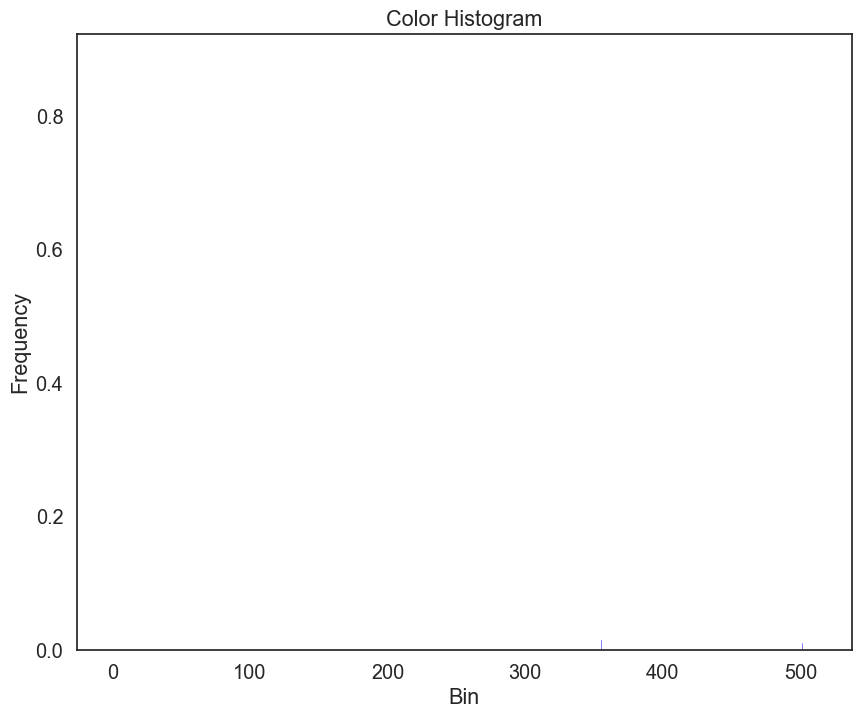

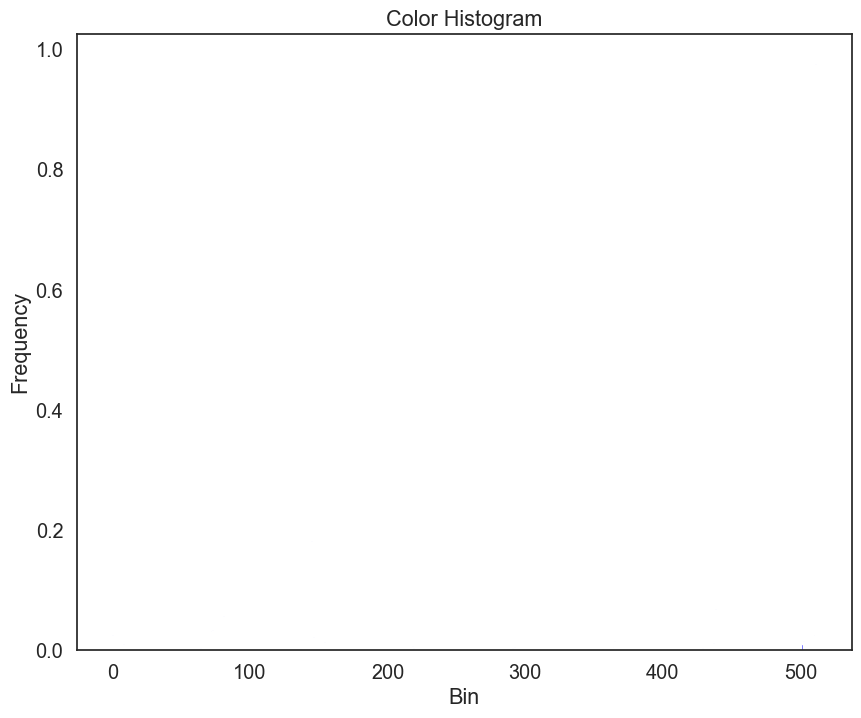

Chi-squared similarity score: 7.213094388107458


In [189]:
# Paths to the images
fgi_image_path = '/Users/swh/Desktop/kaistms/24_1/AIML_BME809/Project/sample/B01DDC83C8/fgi/31aRN-B68jL._AC_.jpg'
cgi_image_path = '/Users/swh/Desktop/kaistms/24_1/AIML_BME809/Project/sample/B01DDC83C8/fgi/31R3esmCldL._AC_.jpg'

# Compute histograms
fgi_hist = compute_color_histogram(fgi_image_path)
cgi_hist = compute_color_histogram(cgi_image_path)

# Plot histograms
plot_histogram(fgi_hist)
plot_histogram(cgi_hist)

# Compare histograms
similarity_score = compare_histograms(fgi_hist, cgi_hist)
print(f"Chi-squared similarity score: {similarity_score}")

In [190]:
# print min and max of first_avail_month and first_rev_month
print('min first_avail_month', df_product['first_avail_month'].min())
print('max first_avail_month', df_product['first_avail_month'].max())
print('min first_rev_month', df_product['first_rev_month'].min())
print('max first_rev_month', df_product['first_rev_month'].max())

min first_avail_month -80.0
max first_avail_month 1073.0
min first_rev_month -14
max first_rev_month 164


In [191]:
# drop rows with first_avail_month < 1 or first_rev_month < 1 or first_avail_month > 100 or first_rev_month > 100
df_product = df_product[(df_product['first_avail_month'] >= 1) & (df_product['first_avail_month'] <= 100)]
df_product = df_product[(df_product['first_rev_month'] >= 1) & (df_product['first_rev_month'] <= 100)]

# print min and max of first_avail_month and first_rev_month
print('min first_avail_month', df_product['first_avail_month'].min())
print('max first_avail_month', df_product['first_avail_month'].max())
print('min first_rev_month', df_product['first_rev_month'].min())
print('max first_rev_month', df_product['first_rev_month'].max())

min first_avail_month 1.0
max first_avail_month 100.0
min first_rev_month 7
max first_rev_month 100


In [192]:
# Group by product_id and month_code, then calculate the number of reviews and average rating for each group
grouped_reviews = df_review.groupby(['product_id', 'month']).agg(
    pre_rev_count=('rating', 'size'),  # Count of reviews
    pre_rating=('rating', 'mean')      # Average rating
).reset_index()

# Now we need to merge this back to the product data and select only the first month's data
# First, we need to merge the products with their first month reviews
df_product = pd.merge(df_product, grouped_reviews, left_on=['product_id', 'first_rev_month'], right_on=['product_id', 'month'], how='left')

# Drop the 'month_code' as it's redundant now and fill missing values if there are no reviews in the first month
df_product.drop(columns=['month'], inplace=True)

# Show the updated product DataFrame with the new columns
print(df_product.head())

   product_id  num_reviews  price  quality  first_avail_month  \
0  B01MCRRIKO          129  25.95      4.6               58.0   
1  B01GX4RFY0          350  26.59      4.3               82.0   
2  B01M0IEK7S          436  16.99      4.2               85.0   
3  B074NZVNLB           21    NaN      4.5               96.0   
4  B0B2WCX4XH          314  27.59      4.3               73.0   

   first_rev_month  treat_dummy          first_cgi_date  \
0               59            1 2016-05-09 09:20:24.000   
1               87            1 2017-06-11 04:55:11.984   
2               90            1 2017-08-15 08:18:14.738   
3               88            1 2017-03-26 10:34:51.000   
4               83            1 2016-07-26 02:29:26.000   

                                            features  \
0  [100% Cotton, Made in the USA - Quality you ca...   
1  [cotton polyester blending, 进口, Zipper closure...   
2  [100% Rayon, Tie closure, Hand Wash Only, ENJO...   
3  [100% Cotton, Imported, Pul

In [193]:
print(len(df_product))
print(len(df_review))

7031
184762


In [194]:
# Check for missing values
print(df_product.isnull().sum())
print(df_review.isnull().sum())

product_id              0
num_reviews             0
price                5636
quality                 0
first_avail_month       0
first_rev_month         0
treat_dummy             0
first_cgi_date          0
features                0
fgi_images              0
pre_rev_count          75
pre_rating             75
dtype: int64
product_id            0
rating                0
text_len              0
title_len             0
month                 0
reviewer_expe         0
cgi_dummy             0
after_dummy           0
timestamp             0
review_text           0
cgi_images            0
helpful_vote          0
treat_dummy           0
Volume                0
Valence               0
Variance              0
AfterTreat            0
review_date           0
TextLen               0
TitleLen              0
CumulativeTextLen     1
CumulativeTitleLen    1
dtype: int64


In [195]:
# print the number of data that has non missing values in the product dataframe
print(len(df_product.dropna()))

1378


In [196]:
# First method: drop missing values.
df_product_clean = df_product.dropna()

# keep only the reviews that was dropped from the product dataframe using the product_id
df_review_clean = df_review[df_review['product_id'].isin(df_product_clean['product_id'])]

In [197]:
print(len(df_review_clean))

27729


In [198]:
# Checking for duplicates
duplicates = df_review.duplicated(subset=['product_id', 'review_date'], keep=False)
print(df_review[duplicates])  # This will print any duplicates

Empty DataFrame
Columns: [product_id, rating, text_len, title_len, month, reviewer_expe, cgi_dummy, after_dummy, timestamp, review_text, cgi_images, helpful_vote, treat_dummy, Volume, Valence, Variance, AfterTreat, review_date, TextLen, TitleLen, CumulativeTextLen, CumulativeTitleLen]
Index: []

[0 rows x 22 columns]


In [199]:
# keep the original df_review and save another copy that drop cgi_images, review_text and save it to stata file
df_review.to_csv('reviews_clean.csv', index=False)
df_review_stata = df_review_clean.drop(columns=['cgi_images', 'review_text'])
df_review_stata.to_stata('reviews_clean.dta')

In [200]:
# df_review.to_stata('total_review.dta')

In [201]:
# ! pip install statsmodels
# ! pip install psmpy
import pandas as pd
from datetime import datetime
import json
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from scipy.stats import ttest_ind
from psmpy import PsmPy

# Standardize the covariates
scaler = StandardScaler()
df_product_clean[['normalized_price', 'normalized_pre_rating', 'normalized_pre_rev_count', 'normalized_first_avail_month', 'normalized_first_rev_month']] = scaler.fit_transform(
    df_product_clean[['price', 'pre_rating', 'pre_rev_count', 'first_avail_month', 'first_rev_month']])


# Define covariates and treatment variable
covariates = ['normalized_price', 'normalized_pre_rating', 'normalized_pre_rev_count', 'normalized_first_avail_month', 'normalized_first_rev_month']
treatment = 'treat_dummy'

/var/folders/vz/_y_gw0w915v4z_x6ps3fjwwm0000gn/T/ipykernel_93595/4108349748.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_clean[['normalized_price', 'normalized_pre_rating', 'normalized_pre_rev_count', 'normalized_first_avail_month', 'normalized_first_rev_month']] = scaler.fit_transform(
/var/folders/vz/_y_gw0w915v4z_x6ps3fjwwm0000gn/T/ipykernel_93595/4108349748.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_clean[['normalized_price', 'normalized_pre_rating', 'normalized_p

In [202]:
df_product_clean.head()

,product_id,num_reviews,price,quality,first_avail_month,first_rev_month,treat_dummy,first_cgi_date,features,fgi_images,pre_rev_count,pre_rating,normalized_price,normalized_pre_rating,normalized_pre_rev_count,normalized_first_avail_month,normalized_first_rev_month
0,B01MCRRIKO,129,25.95,4.6,58.0,59,1,2016-05-09 09:20:24.000,"[100% Cotton, Made in the USA - Quality you ca...",[https://m.media-amazon.com/images/I/71I2PEV7r...,1.0,5.000000,-0.387617,0.671431,-0.360582,-0.893456,-1.177067
1,B01GX4RFY0,350,26.59,4.3,82.0,87,1,2017-06-11 04:55:11.984,"[cotton polyester blending, 进口, Zipper closure...",[https://m.media-amazon.com/images/I/61Xymhl9v...,1.0,5.000000,-0.369440,0.671431,-0.360582,0.425786,0.510317
2,B01M0IEK7S,436,16.99,4.2,85.0,90,1,2017-08-15 08:18:14.738,"[100% Rayon, Tie closure, Hand Wash Only, ENJO...",[https://m.media-amazon.com/images/I/81yU2Ncc7...,4.0,3.500000,-0.642091,-0.822125,2.420474,0.590691,0.691108
4,B0B2WCX4XH,314,27.59,4.3,73.0,83,1,2016-07-26 02:29:26.000,"[cotton polyester blending, Imported, Zipper c...",[https://m.media-amazon.com/images/I/71yV4zJ5R...,3.0,3.666667,-0.341039,-0.656174,1.493455,-0.068930,0.269262
5,B0B18BJD99,142,18.99,4.3,46.0,95,1,2021-06-20 05:07:30.182,"[cotton/polyester, Pull-On closure, Machine Wa...",[https://m.media-amazon.com/images/I/81EPWkXg+...,1.0,4.000000,-0.585289,-0.324273,-0.360582,-1.553077,0.992427


In [203]:
# Logistic regression model
logit = sm.Logit(df_product_clean[treatment], df_product_clean[covariates])
result = logit.fit()

# Add the propensity scores to the dataframe
df_product_clean['propensity_score'] = result.predict(df_product_clean[covariates])

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.674340
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            treat_dummy   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1373
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                0.002547
Time:                        02:40:29   Log-Likelihood:                -929.24
converged:                       True   LL-Null:                       -931.61
Covariance Type:            nonrobust   LLR p-value:                    0.3144
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
normalized_price                 0.1004      0.056      1.798      0.072

/var/folders/vz/_y_gw0w915v4z_x6ps3fjwwm0000gn/T/ipykernel_93595/3594376394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_clean['propensity_score'] = result.predict(df_product_clean[covariates])


In [204]:
# print if product_id is missing
print(df_product_clean['product_id'].isnull().sum())
df_product_clean.head()

0


,product_id,num_reviews,price,quality,first_avail_month,first_rev_month,treat_dummy,first_cgi_date,features,fgi_images,pre_rev_count,pre_rating,normalized_price,normalized_pre_rating,normalized_pre_rev_count,normalized_first_avail_month,normalized_first_rev_month,propensity_score
0,B01MCRRIKO,129,25.95,4.6,58.0,59,1,2016-05-09 09:20:24.000,"[100% Cotton, Made in the USA - Quality you ca...",[https://m.media-amazon.com/images/I/71I2PEV7r...,1.0,5.000000,-0.387617,0.671431,-0.360582,-0.893456,-1.177067,0.406714
1,B01GX4RFY0,350,26.59,4.3,82.0,87,1,2017-06-11 04:55:11.984,"[cotton polyester blending, 进口, Zipper closure...",[https://m.media-amazon.com/images/I/61Xymhl9v...,1.0,5.000000,-0.369440,0.671431,-0.360582,0.425786,0.510317,0.523500
2,B01M0IEK7S,436,16.99,4.2,85.0,90,1,2017-08-15 08:18:14.738,"[100% Rayon, Tie closure, Hand Wash Only, ENJO...",[https://m.media-amazon.com/images/I/81yU2Ncc7...,4.0,3.500000,-0.642091,-0.822125,2.420474,0.590691,0.691108,0.656037
4,B0B2WCX4XH,314,27.59,4.3,73.0,83,1,2016-07-26 02:29:26.000,"[cotton polyester blending, Imported, Zipper c...",[https://m.media-amazon.com/images/I/71yV4zJ5R...,3.0,3.666667,-0.341039,-0.656174,1.493455,-0.068930,0.269262,0.570004
5,B0B18BJD99,142,18.99,4.3,46.0,95,1,2021-06-20 05:07:30.182,"[cotton/polyester, Pull-On closure, Machine Wa...",[https://m.media-amazon.com/images/I/81EPWkXg+...,1.0,4.000000,-0.585289,-0.324273,-0.360582,-1.553077,0.992427,0.407830


In [205]:
# Apply the rule-of-thumb
filtered_df = df_product_clean[(df_product_clean['propensity_score'] >= 0.10) & (df_product_clean['propensity_score'] <= 0.90)]
print(filtered_df.shape)

# Filter the review data based on the product_id
df_review_filtered = df_review_clean[df_review_clean['product_id'].isin(filtered_df['product_id'])]
print(df_review_filtered.shape)

(1376, 18)
(27576, 22)


In [206]:
# save the filtered df to csv file
# filtered_df.to_csv('filtered_df.csv')

In [207]:
df_review_filtered.columns

Index(['product_id', 'rating', 'text_len', 'title_len', 'month',
       'reviewer_expe', 'cgi_dummy', 'after_dummy', 'timestamp', 'review_text',
       'cgi_images', 'helpful_vote', 'treat_dummy', 'Volume', 'Valence',
       'Variance', 'AfterTreat', 'review_date', 'TextLen', 'TitleLen',
       'CumulativeTextLen', 'CumulativeTitleLen'],
      dtype='object')

In [208]:
# Initialize PsmPy with the cleaned dataframe
psm = PsmPy(filtered_df, treatment='treat_dummy', indx='product_id', exclude=['propensity_score', 'features', 'fgi_images', 'first_cgi_date'])

# Perform the matching using the propensity scores
psm.logistic_ps(balance=True)

# Perform the matching using the propensity scores
psm.knn_matched(matcher='propensity_score', replacement=False, caliper=0.05)

# Get the matched dataset
matched_data = psm.df_matched

/Users/swh/Library/Python/3.9/lib/python/site-packages/psmpy/psmpy.py:363: UserWarning: Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False
  warnings.warn('Some values do not have a match. These are dropped for purposes of establishing a matched dataframe, and subsequent calculations and plots (effect size). If you do not wish this to be the case please set drop_unmatched=False')


In [209]:
# print number of matched data
print(len(matched_data))

602


In [210]:
# Define covariates and treatment variable
covariates = ['price', 'pre_rating', 'pre_rev_count', 'first_avail_month', 'first_rev_month']
treatment = 'treat_dummy'

# Function to perform t-tests and print p-values and t-statistics
# also want to print the mean of the treated and control groups before standardization
def print_t_tests(data, covariates, treatment):
    for covariate in covariates:
        treated = data[data[treatment] == 1][covariate]
        control = data[data[treatment] == 0][covariate]
        t_stat, p_val = ttest_ind(treated, control)
        print(f'Covariate: {covariate}, Treated mean: {treated.mean():.4f}, Control mean: {control.mean():.4f}, t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}')

# Before matching
print("Before matching:")
print_t_tests(filtered_df, covariates, treatment)

# After matching
print("\nAfter matching:")
print_t_tests(matched_data, covariates, treatment)

Before matching:
Covariate: price, Treated mean: 40.4329, Control mean: 38.4459, t-statistic: 1.0280, p-value: 0.3041
Covariate: pre_rating, Treated mean: 4.3718, Control mean: 4.2581, t-statistic: 2.0651, p-value: 0.0391
Covariate: pre_rev_count, Treated mean: 1.4361, Control mean: 1.2616, t-statistic: 3.8423, p-value: 0.0001
Covariate: first_avail_month, Treated mean: 76.5135, Control mean: 70.9199, t-statistic: 5.6673, p-value: 0.0000
Covariate: first_rev_month, Treated mean: 80.4693, Control mean: 75.6762, t-statistic: 5.3161, p-value: 0.0000

After matching:
Covariate: price, Treated mean: 39.8265, Control mean: 41.6461, t-statistic: -0.5835, p-value: 0.5598
Covariate: pre_rating, Treated mean: 4.3347, Control mean: 4.3407, t-statistic: -0.0750, p-value: 0.9403
Covariate: pre_rev_count, Treated mean: 1.3056, Control mean: 1.2658, t-statistic: 0.7003, p-value: 0.4840
Covariate: first_avail_month, Treated mean: 72.3422, Control mean: 72.9037, t-statistic: -0.3866, p-value: 0.6992
Co

product_id                       object
num_reviews                       int64
price                           float64
quality                         float64
first_avail_month               float64
first_rev_month                   int64
pre_rev_count                   float64
pre_rating                      float64
normalized_price                float64
normalized_pre_rating           float64
normalized_pre_rev_count        float64
normalized_first_avail_month    float64
normalized_first_rev_month      float64
propensity_score                float64
propensity_logit                float64
treat_dummy                       int64
matched_ID                       object
dtype: object
             num_reviews      price   quality  first_avail_month  \
treat_dummy                                                        
0              20.000000  41.646080  4.136213          72.903654   
1              20.790698  39.826478  4.146179          72.342193   

             first_rev_month  pre

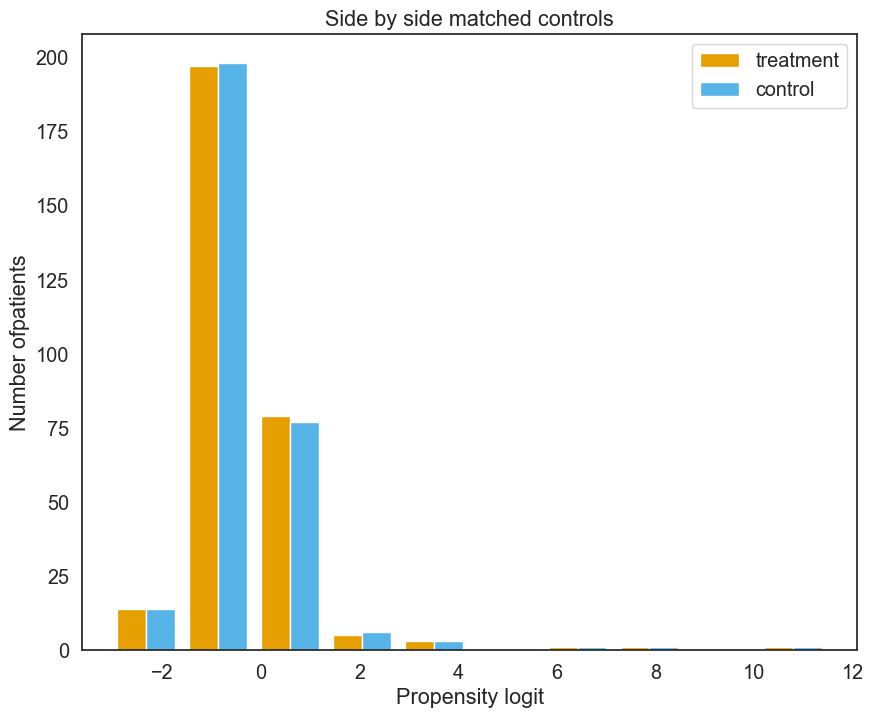

In [211]:
# Check the data types of each column
print(matched_data.dtypes)

# Select only numeric columns for calculating the mean
numeric_cols = matched_data.select_dtypes(include='number').columns

# Group by 'treat_dummy' and calculate the mean for numeric columns only
grouped_means = matched_data.groupby('treat_dummy')[numeric_cols].mean()

print(grouped_means)

# Plot the covariate balance
psm.plot_match(Title='Side by side matched controls', Ylabel='Number ofpatients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], colors=['#E69F00', '#56B4E9'] ,save=True)

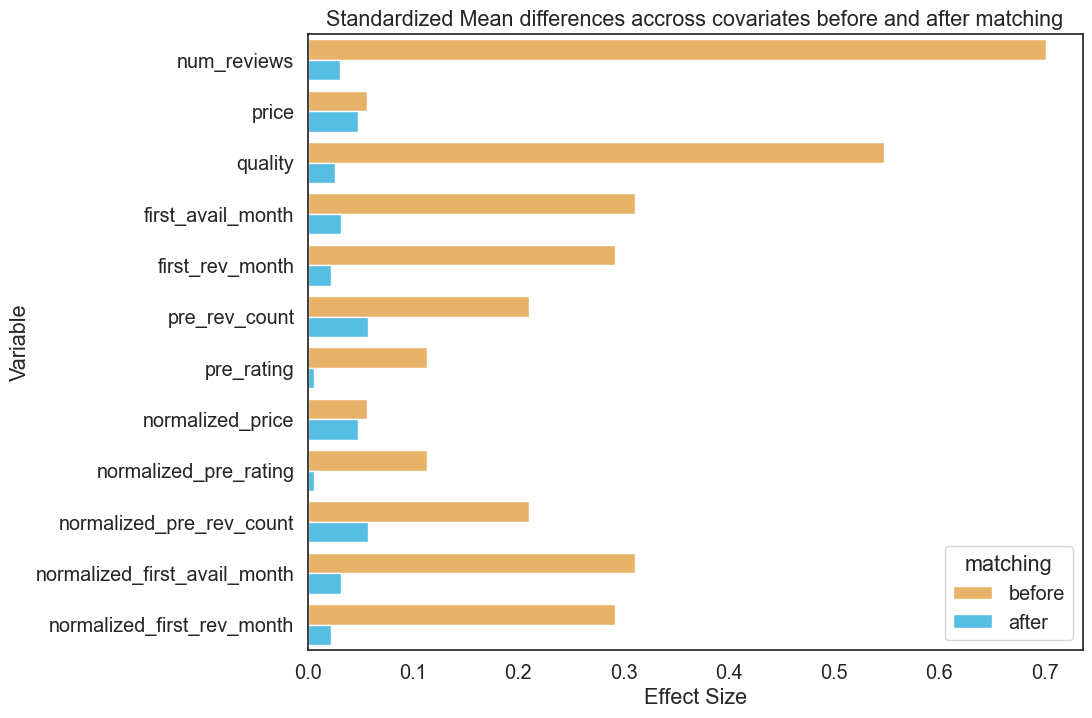

In [212]:
psm.effect_size_plot(title='Standardized Mean differences accross covariates before and after matching', before_color='#FCB754', after_color='#3EC8FB', save=False)

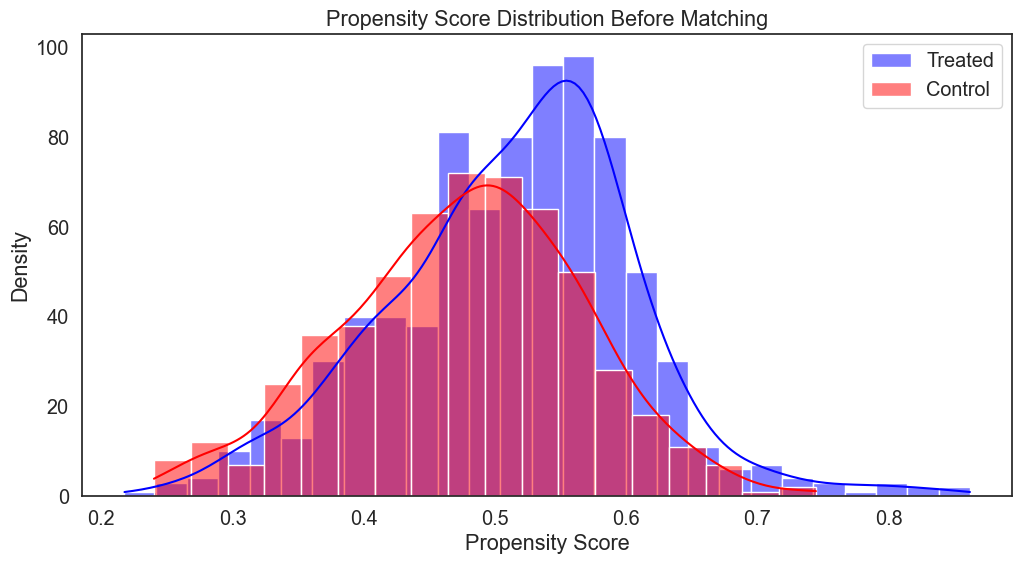

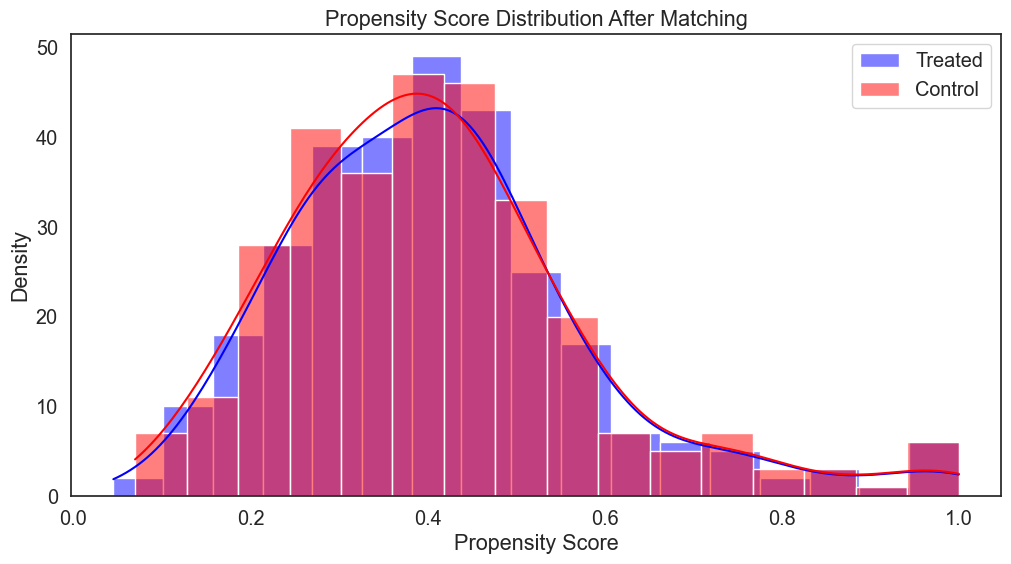

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot propensity score distributions before matching
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df[filtered_df[treatment] == 1]['propensity_score'], color='blue', label='Treated', kde=True)
sns.histplot(filtered_df[filtered_df[treatment] == 0]['propensity_score'], color='red', label='Control', kde=True)
plt.title('Propensity Score Distribution Before Matching')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot propensity score distributions after matching
plt.figure(figsize=(12, 6))
sns.histplot(matched_data[matched_data[treatment] == 1]['propensity_score'], color='blue', label='Treated', kde=True)
sns.histplot(matched_data[matched_data[treatment] == 0]['propensity_score'], color='red', label='Control', kde=True)
plt.title('Propensity Score Distribution After Matching')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [214]:
import pandas as pd

# Define the covariates
covariates_product = ['num_reviews', 'price', 'quality', 'first_avail_month', 'first_rev_month', 'treat_dummy']
covariates_review = ['rating', 'text_len', 'title_len', 'month', 'reviewer_expe', 'cgi_dummy', 'helpful_vote']

# Function to compute descriptive statistics and add suffixes
def compute_descriptive_stats(df, covariates, suffix):
    stats = df[covariates].describe().T
    stats['mean'] = stats['mean'].round(2)
    stats['std'] = stats['std'].round(3)
    stats['min'] = stats['min'].round(2)
    stats['max'] = stats['max'].round(2)
    stats = stats[['count', 'mean', 'std', 'min', 'max']]
    # Rename columns to include the suffix (before/after)
    stats.columns = [f'{col}_{suffix}' for col in stats.columns]
    return stats

# Compute statistics before and after matching with appropriate suffixes
stats_product_before = compute_descriptive_stats(filtered_df, covariates_product, 'before')
stats_product_after = compute_descriptive_stats(matched_data, covariates_product, 'after')

stats_review_before = compute_descriptive_stats(df_review_filtered, covariates_review, 'before')
stats_review_after = compute_descriptive_stats(df_review_filtered[df_review_filtered['product_id'].isin(matched_data['product_id'])], covariates_review, 'after')

# Interleave the columns correctly for before and after
def interleave_columns(df1, df2):
    combined = pd.DataFrame()
    for col in ['count', 'mean', 'std', 'min', 'max']:
        combined[f'{col}_before'] = df1[f'{col}_before']
        combined[f'{col}_after'] = df2[f'{col}_after']
    return combined

# Create interleaved statistics DataFrames
stats_product_combined = interleave_columns(stats_product_before, stats_product_after)
stats_review_combined = interleave_columns(stats_review_before, stats_review_after)

# Display the combined statistics
print("Product Level Descriptive Statistics:")
print(stats_product_combined)
print("\nReview Level Descriptive Statistics:")
print(stats_review_combined)

Product Level Descriptive Statistics:
                   count_before  count_after  mean_before  mean_after  \
num_reviews              1376.0        602.0        70.18       20.40   
price                    1376.0        602.0        39.62       40.74   
quality                  1376.0        602.0         4.14        4.14   
first_avail_month        1376.0        602.0        74.23       72.62   
first_rev_month          1376.0        602.0        78.51       78.04   
treat_dummy              1376.0        602.0         0.59        0.50   

                   std_before  std_after  min_before  min_after  max_before  \
num_reviews           140.054     25.682        5.00       5.00       988.0   
price                  35.243     38.234        3.98       6.09       390.0   
quality                 0.390      0.389        2.40       2.40         5.0   
first_avail_month      18.199     17.805        1.00       7.00       100.0   
first_rev_month        16.602     16.288       14.00   

In [215]:
# ! pip install tabulate
import pandas as pd
from tabulate import tabulate

# make a table for the product level descriptive statistics
table_product = tabulate(stats_product_combined, headers='keys', tablefmt='pretty')

print(table_product)

+-------------------+--------------+-------------+-------------+------------+------------+-----------+------------+-----------+------------+-----------+
|                   | count_before | count_after | mean_before | mean_after | std_before | std_after | min_before | min_after | max_before | max_after |
+-------------------+--------------+-------------+-------------+------------+------------+-----------+------------+-----------+------------+-----------+
|    num_reviews    |    1376.0    |    602.0    |    70.18    |    20.4    |  140.054   |  25.682   |    5.0     |    5.0    |   988.0    |   268.0   |
|       price       |    1376.0    |    602.0    |    39.62    |   40.74    |   35.243   |  38.234   |    3.98    |   6.09    |   390.0    |   390.0   |
|      quality      |    1376.0    |    602.0    |    4.14     |    4.14    |    0.39    |   0.389   |    2.4     |    2.4    |    5.0     |    5.0    |
| first_avail_month |    1376.0    |    602.0    |    74.23    |   72.62    |   18

In [216]:
# make a table for the review level descriptive statistics
table_review = tabulate(stats_review_combined, headers='keys', tablefmt='pretty')

print(table_review)

+---------------+--------------+-------------+-------------+------------+------------+-----------+------------+-----------+------------+-----------+
|               | count_before | count_after | mean_before | mean_after | std_before | std_after | min_before | min_after | max_before | max_after |
+---------------+--------------+-------------+-------------+------------+------------+-----------+------------+-----------+------------+-----------+
|    rating     |   27576.0    |   9484.0    |    4.23     |    4.22    |   1.167    |   1.186   |    1.0     |    1.0    |    5.0     |    5.0    |
|   text_len    |   27576.0    |   9484.0    |    32.27    |    31.2    |   37.898   |  37.327   |    0.0     |    0.0    |   593.0    |   593.0   |
|   title_len   |   27576.0    |   9484.0    |    4.22     |    4.14    |   3.633    |   3.562   |    1.0     |    1.0    |    34.0    |   34.0    |
|     month     |   27576.0    |   9484.0    |    92.09    |   95.36    |   22.865   |  24.029   |    14.0

In [217]:
# Define the control variables
control_vars = ['price', 'pre_rating', 'pre_rev_count', 'first_avail_month', 'first_rev_month']

# Compute descriptive statistics
control_stats = matched_data[control_vars].describe().round(3)

print("Descriptive Statistics for Control Variables:")
print(control_stats)

Descriptive Statistics for Control Variables:
         price  pre_rating  pre_rev_count  first_avail_month  first_rev_month
count  602.000     602.000        602.000            602.000          602.000
mean    40.736       4.338          1.286             72.623           78.038
std     38.234       0.984          0.698             17.805           16.288
min      6.090       1.000          1.000              7.000           19.000
25%     19.990       4.000          1.000             61.000           67.000
50%     27.970       5.000          1.000             74.000           81.000
75%     46.815       5.000          1.000             87.000           92.000
max    390.000       5.000          7.000            100.000          100.000


In [218]:
df_review_filtered.head()

,product_id,rating,text_len,title_len,month,reviewer_expe,cgi_dummy,after_dummy,timestamp,review_text,...,treat_dummy,Volume,Valence,Variance,AfterTreat,review_date,TextLen,TitleLen,CumulativeTextLen,CumulativeTitleLen
77,B01MCRRIKO,5.0,48,4,59,0,0,0,1405959777000,I got this for my 3 yrd old & 1.5 old. My daug...,...,1,1,5.00,0.0000,0,2014-07-21 16:22:57,48,4,39.545455,4.0
78,B01MCRRIKO,2.0,7,1,64,0,0,0,1419704176000,Fit is too wide for slim-to-average girl.,...,1,2,5.00,0.0000,0,2014-12-27 18:16:16,7,1,48.000000,4.0
79,B01MCRRIKO,5.0,42,4,65,0,0,0,1420239645000,It's just a really narrow dress. My daughter i...,...,1,3,3.50,2.2500,0,2015-01-02 23:00:45,42,4,27.500000,2.5
80,B01MCRRIKO,5.0,20,11,67,0,0,0,1425319637000,"Cute, simple, sun dress! I got this to embroid...",...,1,4,4.00,2.0000,0,2015-03-02 18:07:17,20,11,32.333333,3.0
81,B01MCRRIKO,4.0,21,1,68,0,0,0,1427913481000,"Nice, soft, comfortable. A little thin. Would ...",...,1,5,4.25,1.6875,0,2015-04-01 18:38:01,21,1,29.250000,5.0


In [219]:
# Assuming `matched_data` contains product_ids of matched products
matched_reviews = df_review_filtered[df_review_filtered['product_id'].isin(matched_data['product_id'])]

# Define the review level variables
review_level_vars = ['rating', 'text_len', 'title_len', 'month', 'reviewer_expe', 'cgi_dummy']

# Compute descriptive statistics for these variables
stats = matched_reviews[review_level_vars].describe()

# Extract and display only the 'min', 'max', 'std dev', 'mean' rows
print(stats.loc[['min', 'max', 'std', 'mean']])


        rating    text_len  title_len       month  reviewer_expe  cgi_dummy
min   1.000000    0.000000   1.000000   19.000000       0.000000   0.000000
max   5.000000  593.000000  34.000000  164.000000       1.000000   1.000000
std   1.186062   37.327280   3.561575   24.028973       0.063998   0.174746
mean  4.219000   31.204871   4.142978   95.357339       0.004112   0.031527


In [220]:
matched_products = df_product_clean[df_product_clean['product_id'].isin(matched_data['product_id'])]

matched_products.head()

,product_id,num_reviews,price,quality,first_avail_month,first_rev_month,treat_dummy,first_cgi_date,features,fgi_images,pre_rev_count,pre_rating,normalized_price,normalized_pre_rating,normalized_pre_rev_count,normalized_first_avail_month,normalized_first_rev_month,propensity_score
9,B01IIS2A3K,18,25.00,4.3,83.0,77,0,2018-10-15 07:25:55.627,"[95% Rayon, 5% Spandex, &check; Made in USA, P...",[https://m.media-amazon.com/images/I/41k+Fit7Q...,1.0,4.0,-0.414598,-0.324273,-0.360582,0.480754,-0.092320,0.479905
12,B07BTVQQR1,20,67.95,4.4,35.0,65,0,2019-09-01 22:34:44.674,"[100% Rayon, Imported, Corset closure, Hand Wa...",[https://m.media-amazon.com/images/I/81ShOQdGy...,2.0,5.0,0.805229,0.671431,0.566437,-2.157729,-0.815484,0.440611
13,B071HJ5L7P,16,31.40,4.3,67.0,96,1,2021-09-17 23:43:31.161,"[90% Viscose, 10% Spandex, Imported, Pull On c...",[https://m.media-amazon.com/images/I/51yZlc-HV...,1.0,5.0,-0.232831,0.671431,-0.360582,-0.398740,1.052691,0.502158
17,B00GJMSEJW,23,46.00,3.7,53.0,56,0,2021-08-14 17:22:45.127,"[95% Polyester, 5% Spandex, Imported, Pull On ...",[https://m.media-amazon.com/images/I/31y4IYyQY...,1.0,5.0,0.181825,0.671431,-0.360582,-1.168298,-1.357858,0.401914
27,B06VWYRDYZ,9,17.99,4.3,90.0,93,1,2018-11-25 14:33:21.796,"[Button closure, Girls Chiffon Princess Weddin...",[https://m.media-amazon.com/images/I/516MGOFgX...,1.0,5.0,-0.613690,0.671431,-0.360582,0.865533,0.871900,0.550253


In [221]:
df_review = pd.merge(matched_reviews, matched_products[['product_id', 'fgi_images', 'features', 'first_cgi_date']], on='product_id', how='left')


In [222]:
print(df_review.head())

   product_id  rating  text_len  title_len  month  reviewer_expe  cgi_dummy  \
0  B01IIS2A3K     4.0        15          2     77              0          0   
1  B01IIS2A3K     4.0        47         12     82              0          0   
2  B01IIS2A3K     5.0        17          2     82              0          0   
3  B01IIS2A3K     5.0        12          3     82              0          0   
4  B01IIS2A3K     4.0        57          5     85              0          0   

   after_dummy      timestamp  \
0            0  1452559626000   
1            0  1465595470000   
2            0  1465956537000   
3            0  1467160659000   
4            0  1473306285000   

                                         review_text  ...  Variance  \
0  I love this! Very versatile, can do warm weath...  ...  0.000000   
1  I probably should have ordered a Medium. My me...  ...  0.000000   
2  Nicely made, good fit and quality.  Lovely col...  ...  0.000000   
3  cute dress! Love it! Normally wear a la

In [223]:
# # Assuming df_review already has 'product_id' and 'timestamp' sorted in ascending order
# # If not, you should sort them first
# df_review = df_review.sort_values(['product_id', 'timestamp'])

# # Convert timestamp from milliseconds to datetime
# df_review['review_date'] = pd.to_datetime(df_review['timestamp'], unit='ms')

# # Create the 'AfterTreat' column
# df_review['AfterTreat'] = (df_review['after_dummy'] & df_review['treat_dummy']).astype(int)

# # Compute cumulative count of reviews, mean of ratings, variance of ratings up to but not including the current review
# df_review['Volume'] = df_review.groupby('product_id').cumcount()
# df_review['Valence'] = df_review.groupby('product_id')['rating'].expanding().mean().shift().reset_index(level=0, drop=True)
# df_review['Variance'] = df_review.groupby('product_id')['rating'].expanding().var().shift().reset_index(level=0, drop=True)

# # Calculate the text length and title length for each review
# df_review['TextLen'] = df_review['text_len']
# df_review['TitleLen'] = df_review['title_len']

# # Calculate cumulative averages for text length and title length up to but not including the current review
# df_review['CumulativeTextLen'] = df_review.groupby('product_id')['TextLen'].expanding().mean().shift().reset_index(level=0, drop=True)
# df_review['CumulativeTitleLen'] = df_review.groupby('product_id')['TitleLen'].expanding().mean().shift().reset_index(level=0, drop=True)

# # Print the head of the dataframe to check your data
# print(df_review[['product_id', 'review_date', 'rating', 'Volume', 'Valence', 'Variance', 'TextLen', 'TitleLen', 'CumulativeTextLen', 'CumulativeTitleLen']].head(20))

In [224]:
# describe the df_review columns
print(df_review.describe())

            rating     text_len    title_len        month  reviewer_expe  \
count  9484.000000  9484.000000  9484.000000  9484.000000    9484.000000   
mean      4.219000    31.204871     4.142978    95.357339       0.004112   
min       1.000000     0.000000     1.000000    19.000000       0.000000   
25%       4.000000     8.000000     2.000000    79.000000       0.000000   
50%       5.000000    20.000000     3.000000    93.000000       0.000000   
75%       5.000000    41.000000     5.000000   108.000000       0.000000   
max       5.000000   593.000000    34.000000   164.000000       1.000000   
std       1.186062    37.327280     3.561575    24.028973       0.063998   

         cgi_dummy  after_dummy     timestamp  helpful_vote  treat_dummy  \
count  9484.000000  9484.000000  9.484000e+03   9484.000000  9484.000000   
mean      0.031527     0.268136  1.501133e+12      1.271404     0.414171   
min       0.000000     0.000000  1.301317e+12      0.000000     0.000000   
25%       0

In [225]:
# Checking for duplicates
duplicates = df_review.duplicated(subset=['product_id', 'review_date'], keep=False)
print(df_review[duplicates])  # This will print any duplicates

Empty DataFrame
Columns: [product_id, rating, text_len, title_len, month, reviewer_expe, cgi_dummy, after_dummy, timestamp, review_text, cgi_images, helpful_vote, treat_dummy, Volume, Valence, Variance, AfterTreat, review_date, TextLen, TitleLen, CumulativeTextLen, CumulativeTitleLen, fgi_images, features, first_cgi_date]
Index: []

[0 rows x 25 columns]


In [226]:
# save the df_review to csv file
df_review.to_csv('df_review.csv')

In [227]:
# save the df_review to stata file but after dropping review_text, cgi_images, fgi_images, features
df_review_stata = df_review.drop(columns=['review_text', 'cgi_images', 'fgi_images', 'features'])
df_review_stata.to_stata('matched_review_05.dta') # 05 means 0.05 caliper

In [228]:
# df_review.to_stata('matched_review_1.dta')

In [229]:
from linearmodels import PanelOLS
import statsmodels.api as sm

# If 'const' is not needed because PanelOLS automatically includes it if entity_effects or time_effects are used
control_vars = ['AfterTreat', 'Volume', 'Valence', 'Variance', 'TextLen', 'TitleLen']
control = df_review[control_vars]
treat = df_review['rating']

# Define the model assuming that product_id and review_date are part of the index
mod = PanelOLS(treat, control, entity_effects=True, time_effects=True)

# Fit the model
fit = mod.fit(cov_type='clustered', cluster_entity=True, drop_absorbed=True)

ValueError: Series can only be used with a 2-level MultiIndex